In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/Turbofan_HPC_Efficiency.csv")
df.head()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
0,38.467255,11.217579,102.952769,14.349541,120.587661,445.559446,1.666404,308.277091,2.342404,0.999534,1.103993,14944.835419,3261.916032,0.551987,40.134570,722.008949,0.861717
1,44.217856,13.586609,108.449503,15.271965,134.847057,512.666723,1.838548,310.964933,2.424760,0.999713,1.218305,14944.835419,3457.002243,0.675294,44.290294,810.585622,0.789251
2,38.413089,11.196754,102.897310,14.342064,120.453052,444.968535,1.664960,308.252517,2.341573,0.999532,1.103032,14944.835419,3260.182614,0.550923,40.099662,721.251985,0.862491
3,34.905462,9.798766,99.285488,13.898886,111.670620,407.283489,1.570330,306.645196,2.287458,0.999362,1.039987,14944.835419,3143.194846,0.485147,37.807693,677.901510,0.911628
4,38.788102,11.340700,103.280789,14.394312,121.384538,449.064098,1.674947,308.422881,2.347317,0.999547,1.109677,14944.835419,3272.188503,0.558328,40.341220,726.539704,0.857156


columns description

1. **NetThrust_kN**: The net thrust produced by the engine, measured in kilonewtons (kN). This is the actual thrust available for propelling the aircraft, accounting for the difference between the gross thrust and the drag caused by intake airflow.

2. **CoreNozzleGrossThrust_kN**: The gross thrust generated by the core nozzle of the engine, measured in kilonewtons (kN). This represents the total thrust produced by the core of the engine before any losses are accounted for.

3. **BypassNozzleGrossThrust_kN**: The gross thrust generated by the bypass nozzle of the engine, measured in kilonewtons (kN). This reflects the total thrust produced by the bypass air (the air that bypasses the core of the engine).

4. **Sp.FuelConsumption_g/(kN*s)**: Specific fuel consumption, measured in grams per kilonewton-second (g/(kN*s)). This metric indicates how efficiently the engine uses fuel to produce thrust, with lower values indicating higher efficiency.

5. **SpecificThrust_m/s**: Specific thrust, measured in meters per second (m/s). It is the thrust produced per unit mass flow rate of air through the engine, providing an indication of the engine's efficiency and performance.

6. **CoreNozzleVel.V8_m/s**: The velocity of the exhaust gases exiting the core nozzle, measured in meters per second (m/s). This speed impacts the thrust generated by the core of the engine.

7. **CoreNozzlePressureRatio**: The pressure ratio across the core nozzle, representing the ratio of the pressure at the nozzle exit to the pressure at the nozzle entrance. This ratio is critical for determining the efficiency and performance of the nozzle.

8. **BypassNozzleVel.V18_m/s**: The velocity of the exhaust gases exiting the bypass nozzle, measured in meters per second (m/s). This speed impacts the thrust generated by the bypass air.

9. **BypassNozzlePressureRatio**: The pressure ratio across the bypass nozzle, representing the ratio of the pressure at the nozzle exit to the pressure at the nozzle entrance. This ratio is important for the performance of the bypass section of the engine.

10. **BurnerEfficiency**: The efficiency of the combustion process within the burner or combustor of the engine. It indicates how effectively the fuel is being burned to generate heat and subsequently thrust.

11. **EnginePressureRatioP5/P2**: The overall pressure ratio of the engine, calculated as the ratio of the pressure at station 5 (exit of the high-pressure turbine) to the pressure at station 2 (compressor inlet). This ratio is a key indicator of the engine's overall performance.

12. **HPSpoolSpeed_RPM**: The rotational speed of the high-pressure spool (compressor and turbine) of the engine, measured in revolutions per minute (RPM). This speed is crucial for maintaining the correct airflow and pressure through the high-pressure sections of the engine.

13. **LPSpoolSpeed_RPM**: The rotational speed of the low-pressure spool (compressor and turbine) of the engine, measured in revolutions per minute (RPM). The low-pressure spool works in conjunction with the high-pressure spool to optimize engine performance.

14. **FuelFlow_kg/s**: The rate of fuel consumption by the engine, measured in kilograms per second (kg/s). This rate directly impacts the engine's thrust and efficiency.

15. **LPTExitPressureP5_kPA**: The pressure at the exit of the low-pressure turbine (LPT), measured in kilopascals (kPA). This parameter is important for understanding the performance and efficiency of the turbine stage.

16. **LPTExitTemperatureT5_K**: The temperature at the exit of the low-pressure turbine, measured in Kelvin (K). This temperature affects the efficiency of the turbine and the overall thermal efficiency of the engine.

17. **Isentr.HPCEfficiency**: The isentropic efficiency of the high-pressure compressor (HPC). This efficiency measures how closely the actual compression process approximates an ideal, isentropic (constant entropy) process, indicating ths operation under various conditions.

In [4]:
df.columns

Index(['NetThrust_kN', 'CoreNozzleGrossThrust_kN',
       'BypassNozzleGrossThrust_kN', 'Sp.FuelConsumption_g/(kN*s)',
       'SpecificThrust_m/s', 'CoreNozzleVel.V8_m/s', 'CoreNozzlePressureRatio',
       'BypassNozzleVel.V18_m/s', 'BypassNozzlePressureRatio',
       'BurnerEfficiency', 'EnginePressureRatioP5/P2', 'HPSpoolSpeed_RPM',
       'LPSpoolSpeed_RPM', 'FuelFlow_kg/s', 'LPTExitPressureP5_kPA',
       'LPTExitTemperatureT5_K', 'Isentr.HPCEfficiency'],
      dtype='object')

In [5]:
df.head()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
0,38.467255,11.217579,102.952769,14.349541,120.587661,445.559446,1.666404,308.277091,2.342404,0.999534,1.103993,14944.835419,3261.916032,0.551987,40.134570,722.008949,0.861717
1,44.217856,13.586609,108.449503,15.271965,134.847057,512.666723,1.838548,310.964933,2.424760,0.999713,1.218305,14944.835419,3457.002243,0.675294,44.290294,810.585622,0.789251
2,38.413089,11.196754,102.897310,14.342064,120.453052,444.968535,1.664960,308.252517,2.341573,0.999532,1.103032,14944.835419,3260.182614,0.550923,40.099662,721.251985,0.862491
3,34.905462,9.798766,99.285488,13.898886,111.670620,407.283489,1.570330,306.645196,2.287458,0.999362,1.039987,14944.835419,3143.194846,0.485147,37.807693,677.901510,0.911628
4,38.788102,11.340700,103.280789,14.394312,121.384538,449.064098,1.674947,308.422881,2.347317,0.999547,1.109677,14944.835419,3272.188503,0.558328,40.341220,726.539704,0.857156


In [6]:
df.tail()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
11966,37.517463,10.849962,101.977175,14.223518,118.224634,435.256994,1.641071,307.847233,2.327787,0.999494,1.087132,14944.835419,3231.451875,0.533630,39.521629,709.172210,0.875314
11967,36.443150,10.420494,100.877732,14.083720,115.536696,423.645148,1.611873,307.353894,2.311314,0.999444,1.067685,14944.835419,3195.697463,0.513255,38.814661,695.698287,0.890465
11968,39.038498,11.437430,103.534981,14.430011,122.006397,451.840761,1.681735,308.536536,2.351126,0.999556,1.114191,14944.835419,3280.190204,0.563326,40.505335,730.149550,0.853620
11969,40.184014,11.883436,104.685200,14.598583,124.845437,464.638801,1.713230,309.059340,2.368360,0.999597,1.135130,14944.835419,3317.067861,0.586630,41.266542,747.022509,0.837992
11970,36.643368,10.501735,101.081563,14.109195,116.039911,425.826138,1.617411,307.446052,2.314371,0.999453,1.071374,14944.835419,3202.430408,0.517008,38.948766,698.175218,0.887662


In [7]:
df.shape

(11971, 17)

In [8]:
df.dtypes

NetThrust_kN                   float64
CoreNozzleGrossThrust_kN       float64
BypassNozzleGrossThrust_kN     float64
Sp.FuelConsumption_g/(kN*s)    float64
SpecificThrust_m/s             float64
CoreNozzleVel.V8_m/s           float64
CoreNozzlePressureRatio        float64
BypassNozzleVel.V18_m/s        float64
BypassNozzlePressureRatio      float64
BurnerEfficiency               float64
EnginePressureRatioP5/P2       float64
HPSpoolSpeed_RPM               float64
LPSpoolSpeed_RPM               float64
FuelFlow_kg/s                  float64
LPTExitPressureP5_kPA          float64
LPTExitTemperatureT5_K         float64
Isentr.HPCEfficiency           float64
dtype: object

In [9]:
df.describe()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,CoreNozzlePressureRatio,BypassNozzleVel.V18_m/s,BypassNozzlePressureRatio,BurnerEfficiency,EnginePressureRatioP5/P2,HPSpoolSpeed_RPM,LPSpoolSpeed_RPM,FuelFlow_kg/s,LPTExitPressureP5_kPA,LPTExitTemperatureT5_K,Isentr.HPCEfficiency
count,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000,1.197100e+04,11971.000000,11971.000000,11971.000000,11971.000000,11971.000000
mean,38.628892,11.282205,103.084040,14.390388,120.971383,447.777292,1.671937,308.353413,2.344368,0.999530,1.107641,1.494484e+04,3266.978242,0.556615,40.267222,726.066460,0.860237
std,2.274080,0.904578,2.283309,0.322028,5.655847,25.250795,0.063290,1.043508,0.034206,0.000091,0.042098,7.276262e-12,74.908588,0.045388,1.530415,31.744915,0.030808
min,33.880462,9.396328,98.189039,13.794478,109.088315,396.634698,1.543633,306.188355,2.271034,0.999302,1.022178,1.494484e+04,3109.219926,0.467363,37.160277,666.834749,0.787461
25%,36.985668,10.639180,101.432144,14.153845,116.896573,429.511069,1.626697,307.604225,2.319622,0.999470,1.077561,1.494484e+04,3213.954990,0.523489,39.173684,702.419292,0.837972
50%,38.491947,11.227067,102.978045,14.352957,120.649011,445.828846,1.667061,308.288297,2.342782,0.999535,1.104430,1.494484e+04,3262.706431,0.552473,40.150476,722.354795,0.861365
75%,40.185508,11.884030,104.686696,14.598812,124.849105,464.655773,1.713272,309.060025,2.368381,0.999597,1.135158,1.494484e+04,3317.117584,0.586661,41.267561,747.044980,0.882846
max,44.371966,13.657509,108.580079,15.302824,135.234720,514.668257,1.843981,311.042031,2.426716,0.999717,1.221906,1.494484e+04,3462.991480,0.679016,44.421186,813.242376,0.925880


In [10]:
df.drop(['LPTExitPressureP5_kPA', 'Isentr.HPCEfficiency', 'LPTExitTemperatureT5_K', 'LPSpoolSpeed_RPM',
         'HPSpoolSpeed_RPM', 'EnginePressureRatioP5/P2', 'EnginePressureRatioP5/P2', 'FuelFlow_kg/s','CoreNozzlePressureRatio',
         'BypassNozzlePressureRatio'],axis=1,inplace=True)

In [11]:
df.columns

Index(['NetThrust_kN', 'CoreNozzleGrossThrust_kN',
       'BypassNozzleGrossThrust_kN', 'Sp.FuelConsumption_g/(kN*s)',
       'SpecificThrust_m/s', 'CoreNozzleVel.V8_m/s', 'BypassNozzleVel.V18_m/s',
       'BurnerEfficiency'],
      dtype='object')

In [12]:
df.corr()

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),SpecificThrust_m/s,CoreNozzleVel.V8_m/s,BypassNozzleVel.V18_m/s,BurnerEfficiency
NetThrust_kN,1.000000,0.999879,0.999778,0.997764,0.999993,0.999744,0.999974,0.991485
CoreNozzleGrossThrust_kN,0.999879,1.000000,0.999414,0.998206,0.999861,0.999859,0.999961,0.990523
BypassNozzleGrossThrust_kN,0.999778,0.999414,1.000000,0.996186,0.999833,0.999049,0.999621,0.993778
Sp.FuelConsumption_g/(kN*s),0.997764,0.998206,0.996186,1.000000,0.997532,0.998998,0.998077,0.980677
SpecificThrust_m/s,0.999993,0.999861,0.999833,0.997532,1.000000,0.999667,0.999957,0.991942
CoreNozzleVel.V8_m/s,0.999744,0.999859,0.999049,0.998998,0.999667,1.000000,0.999848,0.988432
BypassNozzleVel.V18_m/s,0.999974,0.999961,0.999621,0.998077,0.999957,0.999848,1.000000,0.990907
BurnerEfficiency,0.991485,0.990523,0.993778,0.980677,0.991942,0.988432,0.990907,1.000000


In [13]:
df.isnull().sum()

NetThrust_kN                   0
CoreNozzleGrossThrust_kN       0
BypassNozzleGrossThrust_kN     0
Sp.FuelConsumption_g/(kN*s)    0
SpecificThrust_m/s             0
CoreNozzleVel.V8_m/s           0
BypassNozzleVel.V18_m/s        0
BurnerEfficiency               0
dtype: int64

<Axes: xlabel='SpecificThrust_m/s'>

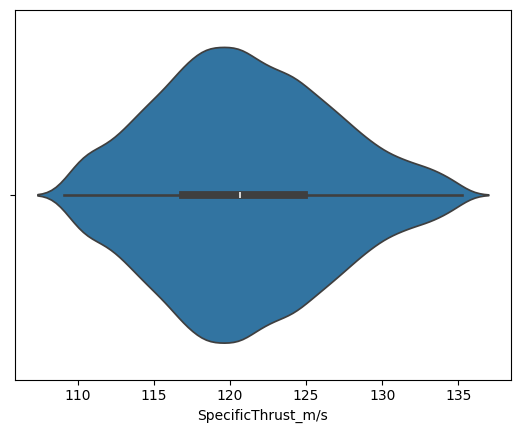

In [14]:
sns.violinplot(x= 'SpecificThrust_m/s',data=df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NetThrust_kN                 11971 non-null  float64
 1   CoreNozzleGrossThrust_kN     11971 non-null  float64
 2   BypassNozzleGrossThrust_kN   11971 non-null  float64
 3   Sp.FuelConsumption_g/(kN*s)  11971 non-null  float64
 4   SpecificThrust_m/s           11971 non-null  float64
 5   CoreNozzleVel.V8_m/s         11971 non-null  float64
 6   BypassNozzleVel.V18_m/s      11971 non-null  float64
 7   BurnerEfficiency             11971 non-null  float64
dtypes: float64(8)
memory usage: 748.3 KB


bivariate analysis

In [16]:
df.columns

Index(['NetThrust_kN', 'CoreNozzleGrossThrust_kN',
       'BypassNozzleGrossThrust_kN', 'Sp.FuelConsumption_g/(kN*s)',
       'SpecificThrust_m/s', 'CoreNozzleVel.V8_m/s', 'BypassNozzleVel.V18_m/s',
       'BurnerEfficiency'],
      dtype='object')

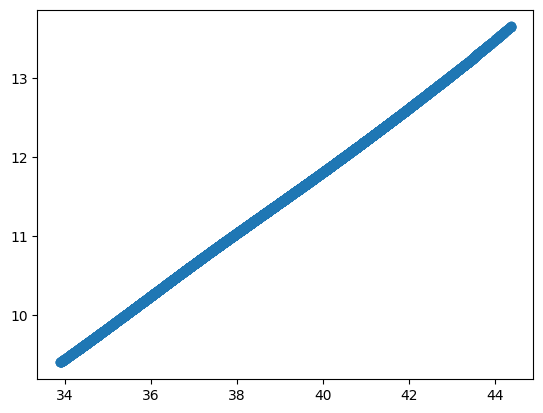

In [17]:
plt.scatter(x='NetThrust_kN',y='CoreNozzleGrossThrust_kN',data=df)

they are both highly correlated.

multivariate analysis

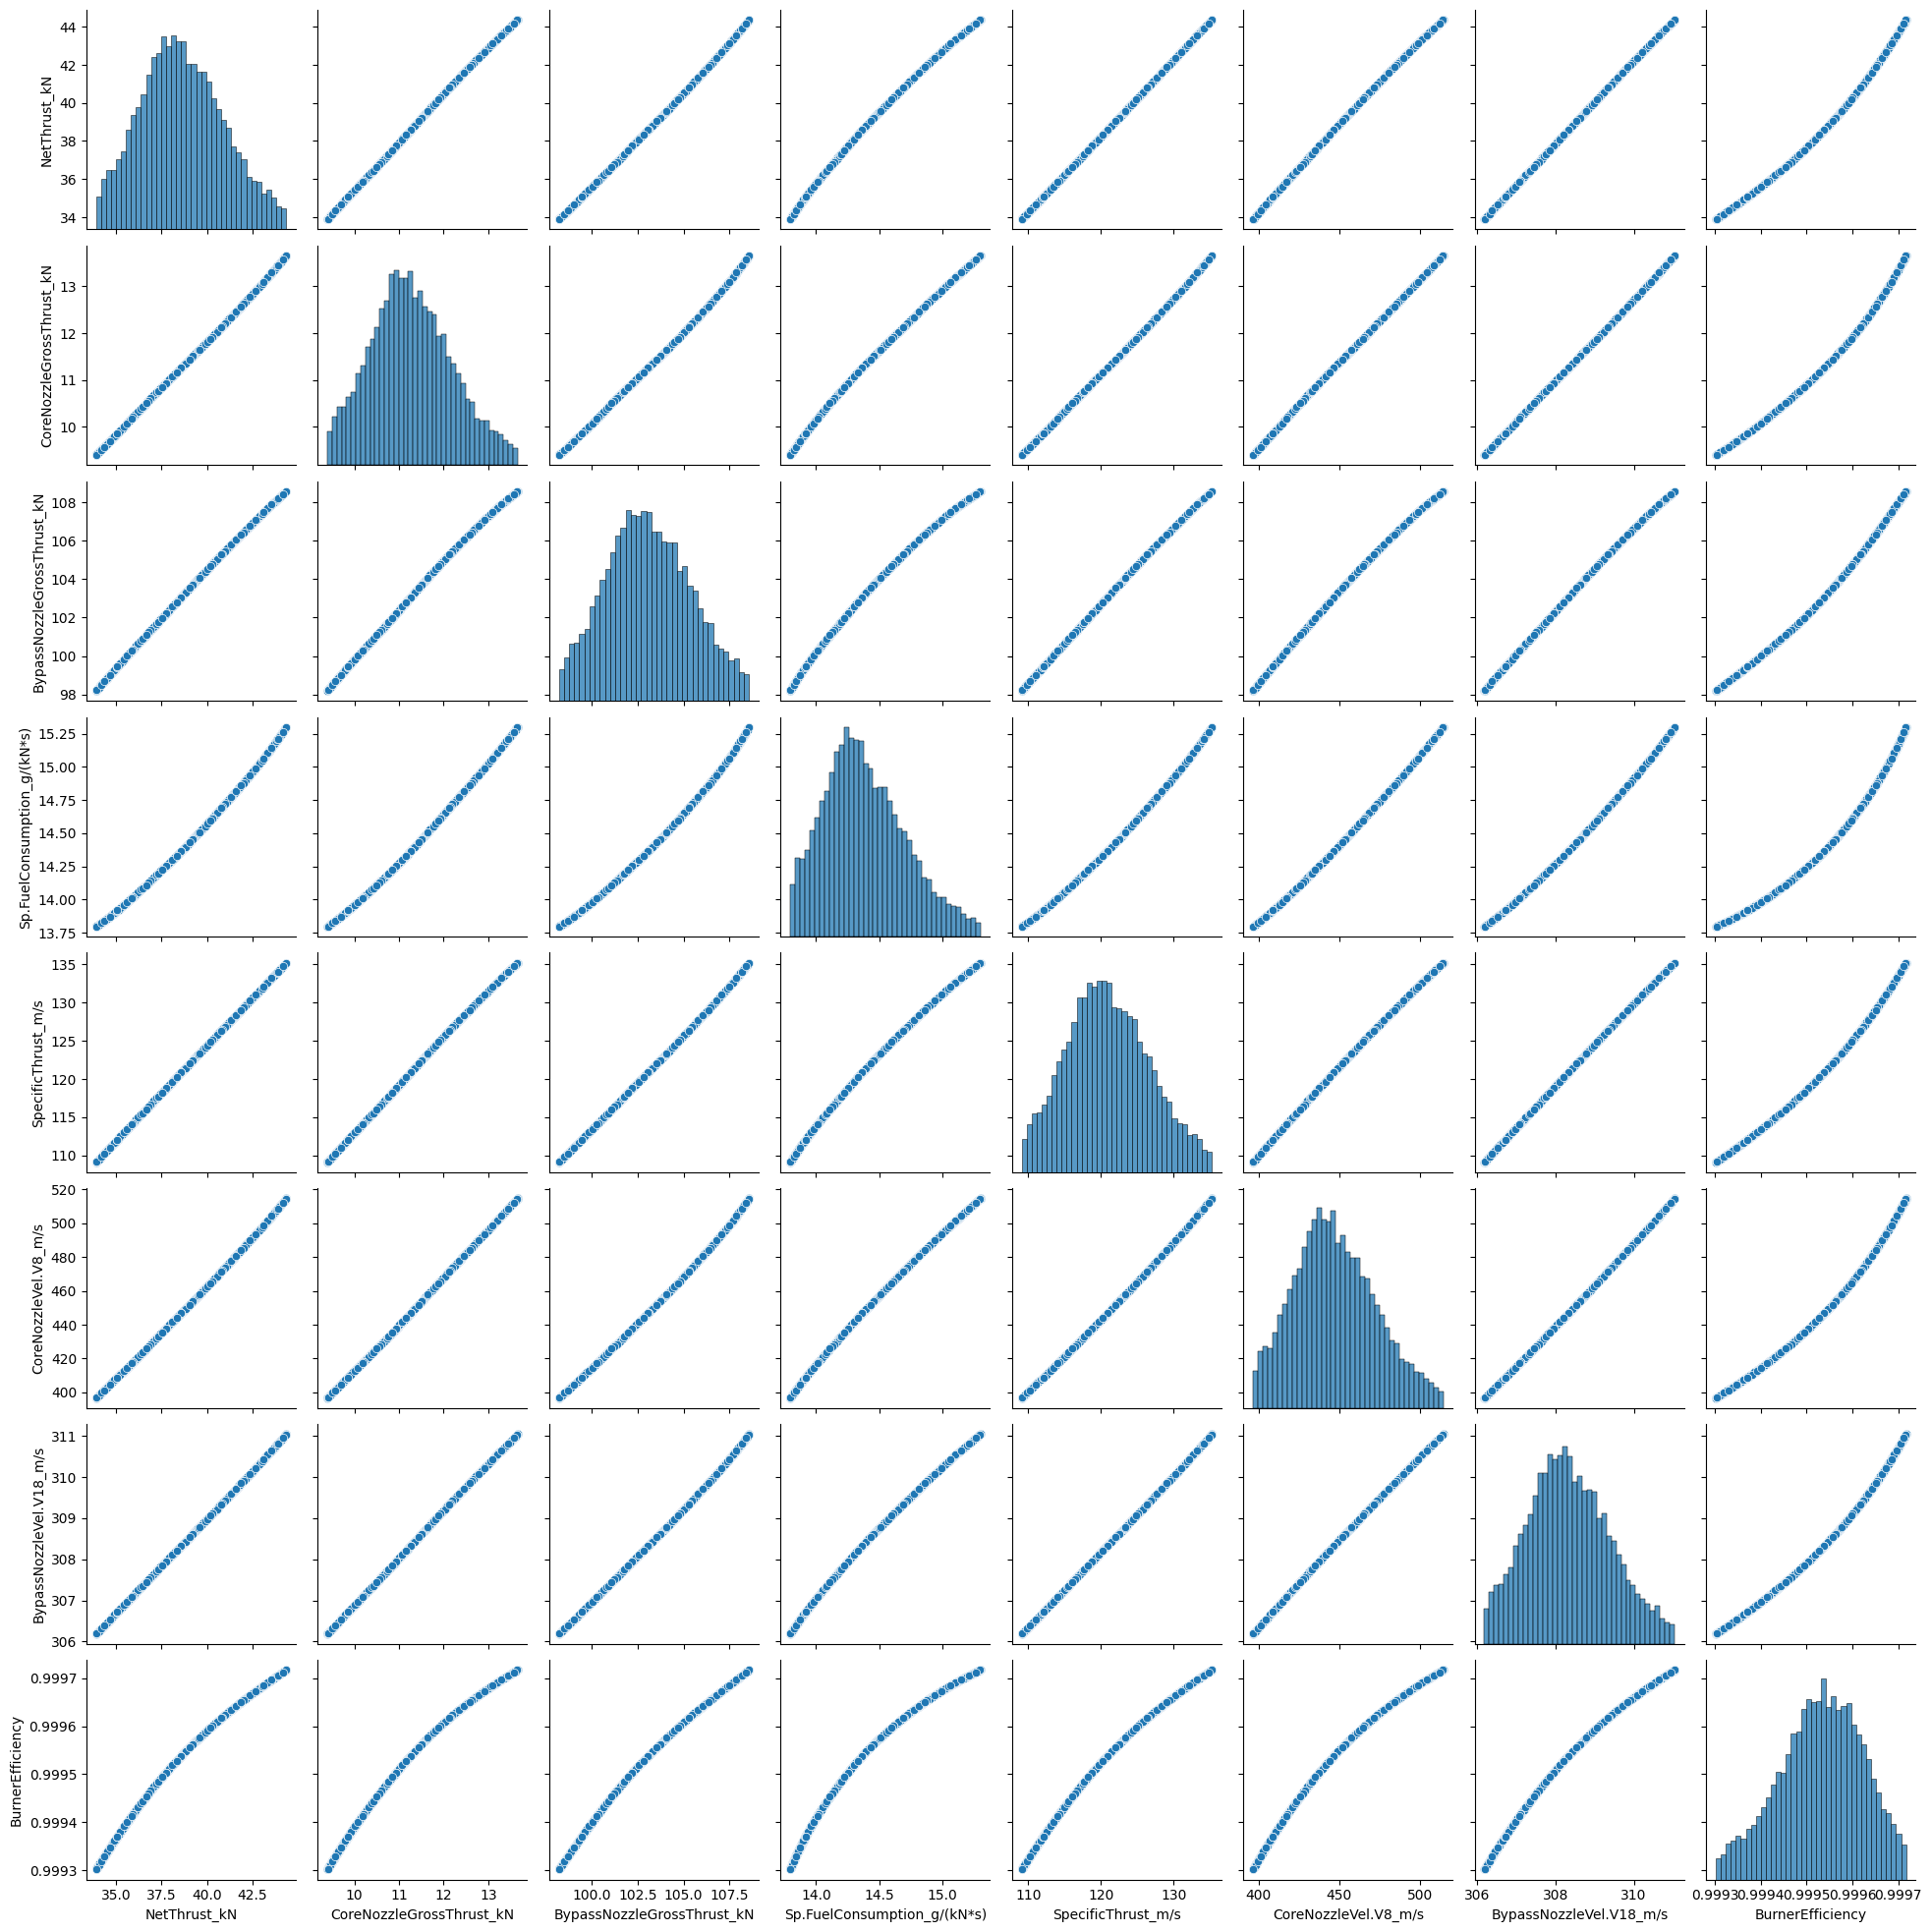

In [18]:
sns.pairplot(df,vars=['NetThrust_kN', 'CoreNozzleGrossThrust_kN',
       'BypassNozzleGrossThrust_kN', 'Sp.FuelConsumption_g/(kN*s)',
       'SpecificThrust_m/s', 'CoreNozzleVel.V8_m/s', 'BypassNozzleVel.V18_m/s',
       'BurnerEfficiency'])

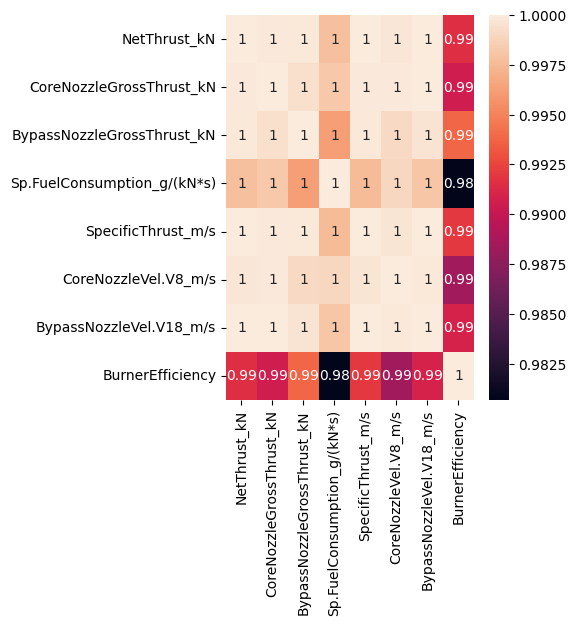

In [19]:
plt.figure(figsize=(4,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

# **outliers detection**

In [ ]:
df.columns

Index(['NetThrust_kN', 'CoreNozzleGrossThrust_kN',
       'BypassNozzleGrossThrust_kN', 'Sp.FuelConsumption_g/(kN*s)',
       'SpecificThrust_m/s', 'CoreNozzleVel.V8_m/s', 'BypassNozzleVel.V18_m/s',
       'BurnerEfficiency'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot SpecificThrust_m/s')

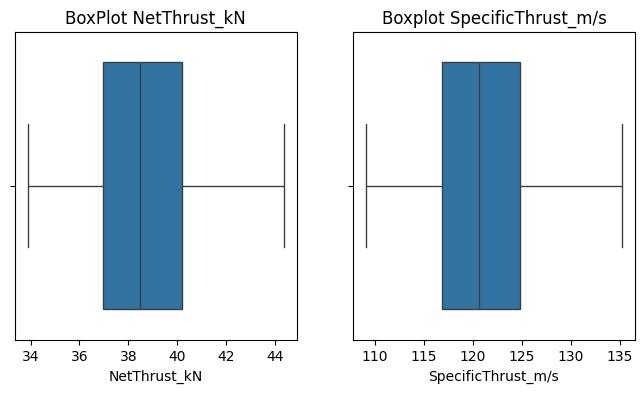

In [26]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

sns.boxplot(data = df,ax=axes[0], x='NetThrust_kN')
axes[0].set_title('BoxPlot NetThrust_kN')

sns.boxplot(data = df,ax=axes[1], x= 'SpecificThrust_m/s')
axes[1].set_title('Boxplot SpecificThrust_m/s')


Text(0.5, 1.0, 'Boxplot BypassNozzleVel.V18_m/s')

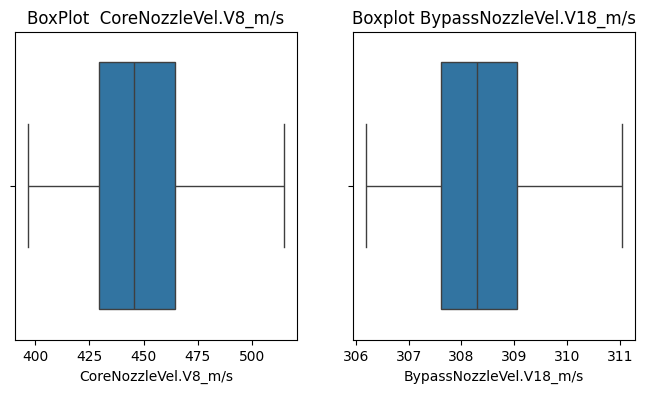

In [27]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

sns.boxplot(data = df,ax=axes[0], x= 'CoreNozzleVel.V8_m/s')
axes[0].set_title('BoxPlot  CoreNozzleVel.V8_m/s')

sns.boxplot(data = df,ax=axes[1], x= 'BypassNozzleVel.V18_m/s')
axes[1].set_title('Boxplot BypassNozzleVel.V18_m/s')

They are no outliers in the columns

# **splitting the dependent and independent variables**

In [29]:
x=df.drop(['SpecificThrust_m/s'],axis=1)
y=df['SpecificThrust_m/s']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

# **scaling**

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(x)
scaled

array([[-0.07108059, -0.07144714, -0.05749377, ..., -0.08783639,
        -0.07314344,  0.04037813],
       [ 2.45778422,  2.54759611,  2.34996107, ...,  2.56990484,
         2.5027402 ,  2.02279306],
       [-0.09490055, -0.09446975, -0.0817835 , ..., -0.11123904,
        -0.09669376,  0.01653458],
       ...,
       [ 0.18012694,  0.17160574,  0.19750298, ...,  0.16093109,
         0.17549515,  0.2846308 ],
       [ 0.6838755 ,  0.66468058,  0.70127491, ...,  0.66778936,
         0.67652238,  0.73734167],
       [-0.87314729, -0.86283633, -0.87704279, ..., -0.86936158,
        -0.86956628, -0.8484531 ]])

In [33]:
X = pd.DataFrame(scaled, columns = x.columns)

In [ ]:
X

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),CoreNozzleVel.V8_m/s,BypassNozzleVel.V18_m/s,BurnerEfficiency
0,-0.071081,-0.071447,-0.057494,-0.126850,-0.087836,-0.073143,0.040378
1,2.457784,2.547596,2.349961,2.737691,2.569905,2.502740,2.022793
2,-0.094901,-0.094470,-0.081784,-0.150068,-0.111239,-0.096694,0.016535
3,-1.637403,-1.639992,-1.663686,-1.526334,-1.603731,-1.637064,-1.859734
4,0.070014,0.064668,0.086172,0.012186,0.050963,0.066575,0.179137
...,...,...,...,...,...,...,...
11966,-0.488758,-0.477860,-0.484784,-0.518205,-0.495858,-0.485096,-0.400583
11967,-0.961194,-0.952651,-0.966317,-0.952341,-0.955738,-0.957885,-0.956597
11968,0.180127,0.171606,0.197503,0.123047,0.160931,0.175495,0.284631
11969,0.683876,0.664681,0.701275,0.646539,0.667789,0.676522,0.737342


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

# **Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [36]:
Pred=LR.predict(X_test)
Pred

array([125.7611273 , 124.92600496, 111.29997177, ..., 121.605251  ,
       129.49316004, 119.53621007])

In [37]:
print("training_accuracy:",LR.score(X_train,y_train))
print("testing accuracy:",LR.score(X_test,y_test))

training_accuracy: 0.9999999942594932
testing accuracy: 0.9999999940941627


In [38]:
from sklearn.metrics import r2_score,mean_squared_error
r2score=r2_score(y_test,Pred)
print("r2_score:",r2score)
mse=mean_squared_error(y_test,Pred)
print("mean squared error:",mse)

r2_score: 0.9999999940941627
mean squared error: 1.8595060405109354e-07


# **Decision Tree Regressor**

In [39]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
pred=DTR.predict(X_test)
pred

array([125.75746596, 124.92516696, 111.29974926, ..., 121.60486377,
       129.49613662, 119.53565984])

In [45]:
print("training_accuracy:",DTR.score(X_train,y_train))
print("testing accuracy:",DTR.score(X_test,y_test))

training_accuracy: 1.0
testing accuracy: 0.9999997393711672


In [41]:
r2score=r2_score(y_test,pred)
print("r2score:",r2score)

mse=mean_squared_error(y_test,pred)
print("mean squared error:",mse)

r2score: 0.9999997393711672
mean squared error: 8.206133468087865e-06


# **Random Forest Regressor**

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [54]:
pred=rf.predict(X_test)
pred

array([125.75762309, 124.92525873, 111.30059505, ..., 121.60480054,
       129.49359732, 119.53520556])

In [55]:
print("training_accuracy:",rf.score(X_train,y_train))
print("testing accuracy:",rf.score(X_test,y_test))

training_accuracy: 0.9999999778737729
testing accuracy: 0.9999998405498148


In [56]:
r2score=r2_score(y_test,pred)
print("r2score:",r2score)
mse=mean_squared_error(y_test,pred)
print("mean squared error:",mse)

r2score: 0.9999998405498148
mean squared error: 5.020432646374439e-06


# **SVR**

In [57]:
from sklearn.svm import SVR
Svr=SVR()
Svr.fit(X_train,y_train)

SVR()

In [58]:
pred=Svr.predict(X_test)
pred

array([125.70310992, 124.83584549, 111.23847405, ..., 121.63748187,
       129.43417634, 119.63382555])

In [59]:
print("training_accuracy:",Svr.score(X_train,y_train))
print("testing accuracy:",Svr.score(X_test,y_test))

training_accuracy: 0.9998605159809841
testing accuracy: 0.9998481487773293


In [60]:
r2score=r2_score(y_test,pred)
print("R2score:",r2score)
mse=mean_squared_error(y_test,pred)
print("mean squared error:",mse)

R2score: 0.9998481487773293
mean squared error: 0.004781172469697095


In [ ]:
X

,NetThrust_kN,CoreNozzleGrossThrust_kN,BypassNozzleGrossThrust_kN,Sp.FuelConsumption_g/(kN*s),CoreNozzleVel.V8_m/s,BypassNozzleVel.V18_m/s,BurnerEfficiency
0,-0.071081,-0.071447,-0.057494,-0.126850,-0.087836,-0.073143,0.040378
1,2.457784,2.547596,2.349961,2.737691,2.569905,2.502740,2.022793
2,-0.094901,-0.094470,-0.081784,-0.150068,-0.111239,-0.096694,0.016535
3,-1.637403,-1.639992,-1.663686,-1.526334,-1.603731,-1.637064,-1.859734
4,0.070014,0.064668,0.086172,0.012186,0.050963,0.066575,0.179137
...,...,...,...,...,...,...,...
11966,-0.488758,-0.477860,-0.484784,-0.518205,-0.495858,-0.485096,-0.400583
11967,-0.961194,-0.952651,-0.966317,-0.952341,-0.955738,-0.957885,-0.956597
11968,0.180127,0.171606,0.197503,0.123047,0.160931,0.175495,0.284631
11969,0.683876,0.664681,0.701275,0.646539,0.667789,0.676522,0.737342


In [ ]:
y

0        120.587661
1        134.847057
2        120.453052
3        111.670620
4        121.384538
            ...    
11966    118.224634
11967    115.536696
11968    122.006397
11969    124.845437
11970    116.039911
Name: SpecificThrust_m/s, Length: 11971, dtype: float64

# **Prediction**

In [ ]:
x_input=[[2.457784,2.547596	,2.349961,2.737691	,2.569905	,2.502740,2.022793	]]
Prediction=LR.predict(x_input)
print(Prediction)

[134.84711209]


In [ ]:
import pickle
pickle.dump(LR,open("turbo_file.pkl","wb"))
